## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [52]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)
print(len(reviews[0]))

25000


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

reviews_text = reviews[0].astype(str)
X_trainval, X_test, y_trainval, y_test = train_test_split(reviews_text, Y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=42)

vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
X_trainval = vectorizer.transform(X_trainval)
print(X_train[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 171 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 8991)	4
  (0, 2584)	5
  (0, 9675)	5
  (0, 9519)	4
  (0, 325)	15
  (0, 3170)	1
  (0, 546)	5
  (0, 8948)	20
  (0, 7671)	1
  (0, 9053)	3
  (0, 2970)	1
  (0, 9765)	2
  (0, 9000)	1
  (0, 7102)	1
  (0, 4449)	1
  (0, 3322)	3
  (0, 503)	6
  (0, 4392)	3
  (0, 8976)	3
  (0, 2449)	2
  (0, 3834)	2
  (0, 4805)	1
  (0, 2003)	1
  (0, 8389)	4
  (0, 3607)	1
  :	:
  (0, 9337)	1
  (0, 2463)	1
  (0, 3059)	1
  (0, 6631)	1
  (0, 316)	1
  (0, 9427)	1
  (0, 8049)	1
  (0, 6285)	1
  (0, 3593)	2
  (0, 2948)	1
  (0, 9689)	1
  (0, 837)	1
  (0, 2719)	1
  (0, 18)	1
  (0, 7157)	1
  (0, 793)	1
  (0, 4089)	1
  (0, 8264)	1
  (0, 3190)	1
  (0, 3097)	1
  (0, 8304)	1
  (0, 153)	1
  (0, 3056)	1
  (0, 1451)	1
  (0, 6259)	1


In [55]:
feature_names = vectorizer.get_feature_names_out()

dense_review_vector = X_train[0].toarray().flatten()
word_counts = []
for i, count in enumerate(dense_review_vector):
    if count > 0:
        word = feature_names[i]
        word_counts.append((word, count))

word_counts_sorted = sorted(word_counts, key=lambda x: x[1], reverse=True)
print("Words in review (most used first):")
for word, count in word_counts_sorted:
    print(f"  {word}: {int(count)}")

Words in review (most used first):
  the: 20
  and: 15
  to: 10
  not: 9
  of: 9
  br: 8
  it: 8
  as: 6
  on: 6
  at: 5
  documentary: 5
  much: 5
  was: 5
  about: 4
  are: 4
  do: 4
  footage: 4
  in: 4
  is: 4
  sport: 4
  that: 4
  this: 4
  too: 4
  very: 4
  but: 3
  felt: 3
  have: 3
  if: 3
  surfers: 3
  these: 3
  they: 3
  time: 3
  times: 3
  would: 3
  actual: 2
  although: 2
  amazing: 2
  be: 2
  been: 2
  better: 2
  could: 2
  did: 2
  event: 2
  events: 2
  for: 2
  fresh: 2
  good: 2
  individual: 2
  locations: 2
  men: 2
  see: 2
  so: 2
  specific: 2
  surfing: 2
  talking: 2
  them: 2
  then: 2
  which: 2
  who: 2
  you: 2
  above: 1
  absolutely: 1
  advise: 1
  all: 1
  an: 1
  avid: 1
  become: 1
  being: 1
  best: 1
  biggest: 1
  boring: 1
  breath: 1
  certain: 1
  changing: 1
  check: 1
  clips: 1
  course: 1
  covered: 1
  covering: 1
  day: 1
  depth: 1
  difficulty: 1
  disappointment: 1
  due: 1
  end: 1
  enjoyed: 1
  entertaining: 1
  especially: 1


Count vectorizer with the max_feature=10000 parameter created a vocabulary with the most common 10000 words from the reviews. When printing the outputs, one word is represented in this format: (row index, column index) value. For example, (0, 73) 1 means that the firts review (row index 0) contains 1 (value) word from the vocabulary which itself is the 74th (column index 73) word in the vocabulary. 

Meanwhile, a full review will be printed like a vector of word counts, e.g. [0, 2, 3, ...., 0], each number corresponding to a word in the vocabulary. 0 means that the word from the vocabulary is not the review and any other number shows how many times it appeared in the review. For example, let's say my vocabulary is [I, tractor, bus] and my review is "I love driving the bus", then the review vector will be [1, 0, 1] because "I" was found in the review once, "tractor" never and "bus" also once.

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model = Sequential() 
model.add(Input(shape=(10000,)))
model.add(Dense(units = 6666, activation='sigmoid')) 
model.add(Dense(units = 1, activation='sigmoid')) 

sgd = SGD(learning_rate = 0.1)
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train.toarray(), y_train, epochs = 20, batch_size = 64, validation_data=(X_val.toarray(), y_val), verbose = 0)

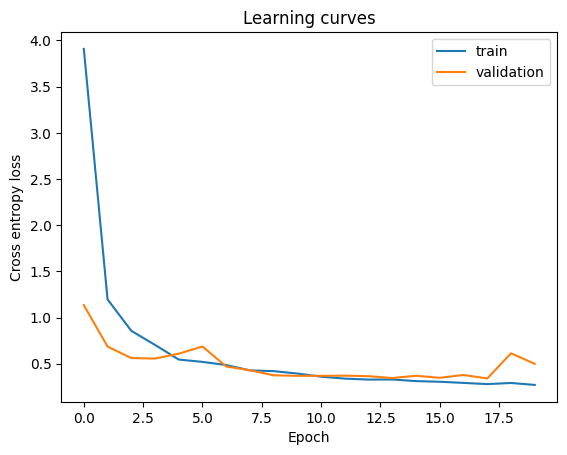

440/440 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8323 - loss: 0.3677
Loss + accuracy on train data: [0.3703721761703491, 0.82740718126297]
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7945 - loss: 0.4858
Loss + accuracy on test data: [0.4724450409412384, 0.7964800000190735]


In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

print("Loss + accuracy on train data: {}".format(model.evaluate(X_train.toarray(), y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test.toarray(), y_test)))

In [35]:
test_sentence_positive = [
    "Breaking Bad is one of the best TV shows ever made, the idea is unique, the actors are fantastic and setting is fitting"
]

test_sentence_negative = [
    "The last season of Game of Thrones was a disappointment, the only interesting part was the fight between the dead and the alive and even there the outcome was rather uninteresting"
]

X_pos = vectorizer.transform(test_sentence_positive).toarray()
X_neg = vectorizer.transform(test_sentence_negative).toarray()

y_pos = np.array([[1]], dtype=np.float32)
y_neg = np.array([[0]], dtype=np.float32)

print(X_pos.shape)
print("Loss + accuracy on positive sentence with positive answer: {}".format(model.evaluate(X_pos, y_pos)))
print("Loss + accuracy on negative sentence with negative answer: {}".format(model.evaluate(X_neg, y_neg)))
print("Loss + accuracy on positive sentence with negative answer: {}".format(model.evaluate(X_pos, y_neg)))
print("Loss + accuracy on negative sentence with positive answer: {}".format(model.evaluate(X_neg, y_pos)))

(1, 10000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.3732
Loss + accuracy on positive sentence with positive answer: [0.3732129633426666, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.2333
Loss + accuracy on negative sentence with negative answer: [0.23325899243354797, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 1.1664
Loss + accuracy on positive sentence with negative answer: [1.1664155721664429, 0.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 1.5700
Loss + accuracy on negative sentence with positive answer: [1.5699694156646729, 0.0]
